In [119]:
# !git clone https://github.com/Riotpiaole/csi5386_bert_poem_clfier.git

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [121]:
data_head_path = "/content/drive/MyDrive/Course_uOttawa/CSI5386/Project/"
file_name = ['1.csv', '2.csv', '3.csv', '4.csv', '5.csv']
file_list = []
for i in file_name:
  f = pd.read_csv(data_head_path+i)
  file_list.append(f)
dataAll = pd.concat(file_list, ignore_index=True)

In [122]:
dataAll[:5]

,Unnamed: 0,Title,Poem,Poet,Tags
0,1,\n The Great San Bernardino...,"\n“I’m interested in feminist oratory,” we thi...",Callie Garnett,"Nature,Animals,Arts & Sciences,Painting & Scul..."
1,2,\n An Animal Unfit for Livi...,"\nI find the heavens beautiful,\nI find the ea...",Ginger Ko,"Relationships,Friends & Enemies,Arts & Science..."
2,3,\n Held in the Arms of St. ...,\nIt tastes like all my night\nwhen I'm at the...,Jasmine Gibson,"Living,The Body,Love,Desire,Religion,Christianity"
3,4,\n 15 Years of Paris\n ...,\n\n\n\n ...,Katy Bohinc,"Love,Desire,Realistic & Complicated,Activities..."
4,5,\n X Number\n,\nof waves dropped into froth Jellyfish a ...,Chris Glomski,"Living,Time & Brevity,Nature,Seas, Rivers, & S..."


Drop index column and Poet column

In [123]:
dataAll = dataAll.drop("Unnamed: 0", 1)
dataAll = dataAll.drop("Poet", 1)

In [124]:
dataAll.head()

,Title,Poem,Tags
0,\n The Great San Bernardino...,"\n“I’m interested in feminist oratory,” we thi...","Nature,Animals,Arts & Sciences,Painting & Scul..."
1,\n An Animal Unfit for Livi...,"\nI find the heavens beautiful,\nI find the ea...","Relationships,Friends & Enemies,Arts & Science..."
2,\n Held in the Arms of St. ...,\nIt tastes like all my night\nwhen I'm at the...,"Living,The Body,Love,Desire,Religion,Christianity"
3,\n 15 Years of Paris\n ...,\n\n\n\n ...,"Love,Desire,Realistic & Complicated,Activities..."
4,\n X Number\n,\nof waves dropped into froth Jellyfish a ...,"Living,Time & Brevity,Nature,Seas, Rivers, & S..."


Was going to do correlation analysis, useless results

In [125]:
from sklearn.preprocessing import LabelEncoder
dataAll_features = dataAll.copy()
l_encoder = LabelEncoder()
columns = [0, 1, 2]
for i in columns:
  l_encoder.fit(dataAll_features.iloc[:, i].astype('str'))
  dataAll_features.iloc[:,i] = l_encoder.transform(dataAll_features.iloc[:,i].astype('str')).astype('float64')

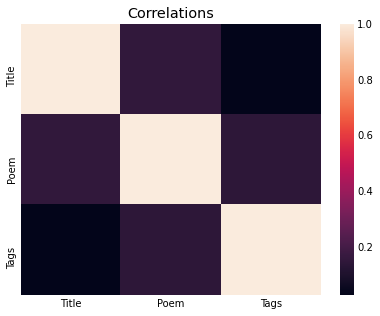

In [126]:
correlation = dataAll_features.corr()
plt.subplots(figsize=(6, 5))
sns.heatmap(correlation)
plt.title("Correlations")
plt.show()

Drop Title column which is also useless

In [127]:
dataAll.Title.head()

0    \n                    The Great San Bernardino...
1    \n                    An Animal Unfit for Livi...
2    \n                    Held in the Arms of St. ...
3    \n                    15 Years of Paris\n     ...
4     \n                    X Number\n                
Name: Title, dtype: object

In [128]:
dataAll.drop('Title', axis=1, inplace=True)

In [129]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Poem    984 non-null    object
 1   Tags    914 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


In [130]:
dataAll.Poem[0]

'\n“I’m interested in feminist oratory,” we think\nJess should say\n“Specifically that.”\n \nYellow-breasted engine sounds on the\nJoshua tree\nJoshua tree mid-shimmy\n \nI think every bird is mad\nat me. Does that make me\nan alcoholic?\n \nLet’s take a break, after\nthe great San Bernardino sculpture party\n \nsparkling toilet pieces lay tiled into\nthe pavilion,\nsilver flushers too.\n \nTV piles. I am\nuneasy. So what?\nNo match for the always sand and always\n \nAir. I find a pair of leather pants\nHanging in a hut & touch them.\nDefinitely not leather.\n \nI can see the sunscreen on your face\nnot rubbed in,\nrivulets wet\n \nthe under-chin. Let’s get this next pitch\nright, guys,\ndecades left of percolation.\n \n'

In [131]:
def preprocess(Poem):
    Poem = Poem.str.replace('(<br/>)', '')
    Poem = Poem.str.replace('(<a).*(>).*(</a>)', '')
    Poem = Poem.str.replace('(&amp)', '')
    Poem = Poem.str.replace('(&gt)', '')
    Poem = Poem.str.replace('(&lt)', '')
    Poem = Poem.str.replace('(\xa0)', ' ')  
    Poem = Poem.str.replace('(\n)', '')
    return Poem
dataAll.Poem = preprocess(dataAll.Poem)

In [132]:
dataAll.Poem.head()

0    “I’m interested in feminist oratory,” we think...
1    I find the heavens beautiful,I find the earth ...
2    It tastes like all my nightwhen I'm at the bot...
3                                                  ...
4    of waves dropped into froth     Jellyfish a ja...
Name: Poem, dtype: object

In [133]:
dataAll.head()

,Poem,Tags
0,"“I’m interested in feminist oratory,” we think...","Nature,Animals,Arts & Sciences,Painting & Scul..."
1,"I find the heavens beautiful,I find the earth ...","Relationships,Friends & Enemies,Arts & Science..."
2,It tastes like all my nightwhen I'm at the bot...,"Living,The Body,Love,Desire,Religion,Christianity"
3,...,"Love,Desire,Realistic & Complicated,Activities..."
4,of waves dropped into froth Jellyfish a ja...,"Living,Time & Brevity,Nature,Seas, Rivers, & S..."


Split categories for each poem

In [134]:
dataAll_splited = dataAll.assign(Tags=dataAll.Tags.str.split(',')).explode('Tags')
dataAll_splited.head()

,Poem,Tags
0,"“I’m interested in feminist oratory,” we think...",Nature
0,"“I’m interested in feminist oratory,” we think...",Animals
0,"“I’m interested in feminist oratory,” we think...",Arts & Sciences
0,"“I’m interested in feminist oratory,” we think...",Painting & Sculpture
0,"“I’m interested in feminist oratory,” we think...",Social Commentaries


In [135]:
dataAll.isnull().sum()

Poem    16
Tags    86
dtype: int64

In [136]:
dataAll.dropna(inplace=True)
dataAll.isnull().sum()

Poem    0
Tags    0
dtype: int64

In [137]:
dataAll.shape

(914, 2)

In [138]:
dataAll_splited = dataAll.assign(Tags=dataAll.Tags.str.split(',')).explode('Tags')
print(dataAll_splited.shape)
dataAll_splited.head()

(5587, 2)


,Poem,Tags
0,"“I’m interested in feminist oratory,” we think...",Nature
0,"“I’m interested in feminist oratory,” we think...",Animals
0,"“I’m interested in feminist oratory,” we think...",Arts & Sciences
0,"“I’m interested in feminist oratory,” we think...",Painting & Sculpture
0,"“I’m interested in feminist oratory,” we think...",Social Commentaries


In [139]:
# dataAll_splited.groupby('Poem').count()
dataAll_splited.isnull().sum()

Poem    0
Tags    0
dtype: int64

In [140]:
pd.set_option('max_rows', None)
dataAll_splited

,Poem,Tags
0,"“I’m interested in feminist oratory,” we think...",Nature
0,"“I’m interested in feminist oratory,” we think...",Animals
0,"“I’m interested in feminist oratory,” we think...",Arts & Sciences
0,"“I’m interested in feminist oratory,” we think...",Painting & Sculpture
0,"“I’m interested in feminist oratory,” we think...",Social Commentaries
0,"“I’m interested in feminist oratory,” we think...",Gender & Sexuality
1,"I find the heavens beautiful,I find the earth ...",Relationships
1,"I find the heavens beautiful,I find the earth ...",Friends & Enemies
1,"I find the heavens beautiful,I find the earth ...",Arts & Sciences
1,"I find the heavens beautiful,I find the earth ...",Language & Linguistics


In [141]:
dataAll_splited.shape

(5587, 2)

In [142]:
category = {}
for i in dataAll_splited.Tags:
  if i not in category:
    category[i] = 1
  else:
    category[i] += 1

category

{' & Streams': 33,
 ' Heavens': 22,
 ' Lesbian': 15,
 ' Planets': 22,
 ' Queer': 15,
 ' Rivers': 33,
 'Activities': 165,
 'Animals': 115,
 'Architecture & Design': 1,
 'Arts & Sciences': 235,
 'Birth & Birthdays': 3,
 'Break-ups & Vexed Love': 25,
 'Christianity': 26,
 'Cities & Urban Life': 24,
 'Class': 6,
 'Coming of Age': 14,
 'Crime & Punishment': 47,
 'Death': 147,
 'Desire': 83,
 'Disappointment & Failure': 14,
 'Easter': 1,
 'Eating & Drinking': 33,
 'Fairy-tales & Legends': 24,
 'Faith & Doubt': 25,
 'Fall': 10,
 'Family & Ancestors': 172,
 'First Love': 3,
 'Friends & Enemies': 27,
 'Gardening': 6,
 'Gay': 15,
 'Gender & Sexuality': 131,
 'Get Well & Recovery': 1,
 'Ghosts & the Supernatural': 24,
 'God & the Divine': 38,
 'Graduation': 1,
 'Greek & Roman Mythology': 13,
 'Growing Old': 26,
 'Health & Illness': 26,
 'Heartache & Loss': 27,
 'Heroes & Patriotism': 9,
 'History & Politics': 194,
 'Home Life': 25,
 'Horror': 4,
 'Humor & Satire': 2,
 'Independence Day': 1,
 'Ind

In [145]:
filtered_category = {}

for i, j in category.items():
  if j > 100:
    filtered_category[i] = j
filtered_category

{'Activities': 165,
 'Animals': 115,
 'Arts & Sciences': 235,
 'Death': 147,
 'Family & Ancestors': 172,
 'Gender & Sexuality': 131,
 'History & Politics': 194,
 'Living': 561,
 'Love': 194,
 'Nature': 273,
 'Relationships': 258,
 'Religion': 156,
 'Social Commentaries': 410,
 'The Body': 107,
 'The Mind': 135,
 'Time & Brevity': 105,
 'War & Conflict': 116}

In [146]:
filtered_category.keys()

dict_keys(['Nature', 'Animals', 'Arts & Sciences', 'Social Commentaries', 'Gender & Sexuality', 'Relationships', 'Living', 'The Body', 'Love', 'Religion', 'Activities', 'Time & Brevity', 'History & Politics', 'War & Conflict', 'Family & Ancestors', 'The Mind', 'Death'])